In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers = 2, random_state=0, cluster_std=0.6)

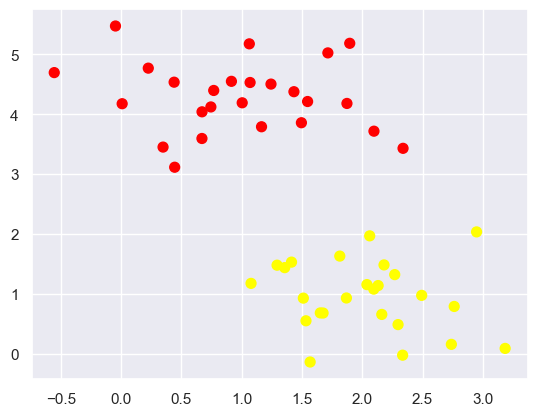

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

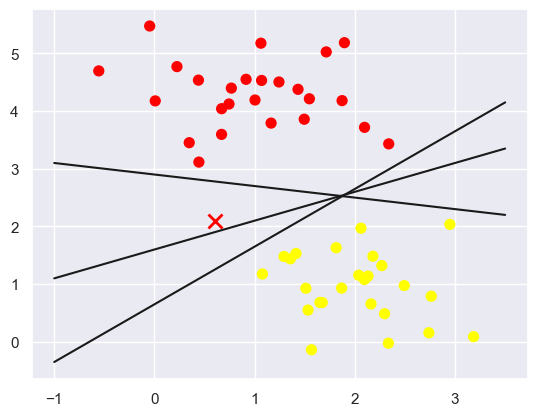

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth = 2, markersize =10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m* xfit + b, '-k')

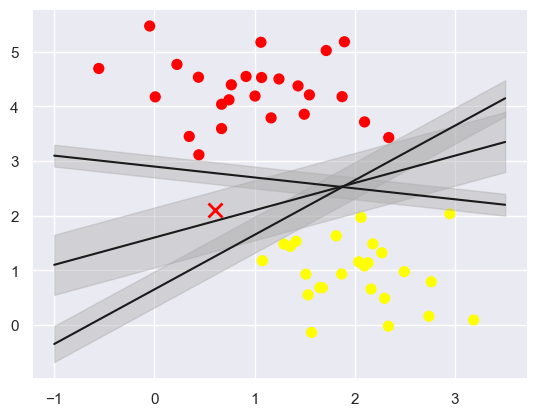

In [7]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth = 2, markersize =10)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color = "#AAAAAA", alpha = 0.4)

In [8]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear', C=1E10)
model.fit(X, y)

,C,10000000000.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [18]:
def plot_svc_decision_function(model, ax=None, plot_support = True):
    if ax is None:
        ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)

    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors='k',
               levels = [-1, 0, 1], alpha = 0.5,
               linestyles = ['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   linewidths=1, facecolors='none')
    
    



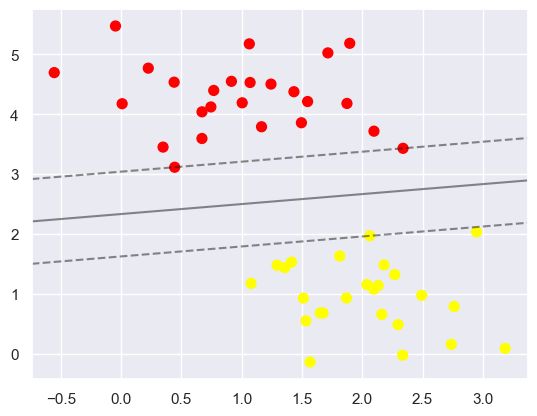

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [20]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [21]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(
        n_samples=200,        
        centers=2,            
        random_state=0,       
        cluster_std=0.60      
    )


    X = X[:N]
    y = y[:N]


    model = SVC(kernel='linear', C=1E10)

    model.fit(X, y)
    

    ax = ax or plt.gca()


    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)


    plot_svc_decision_function(model, ax)




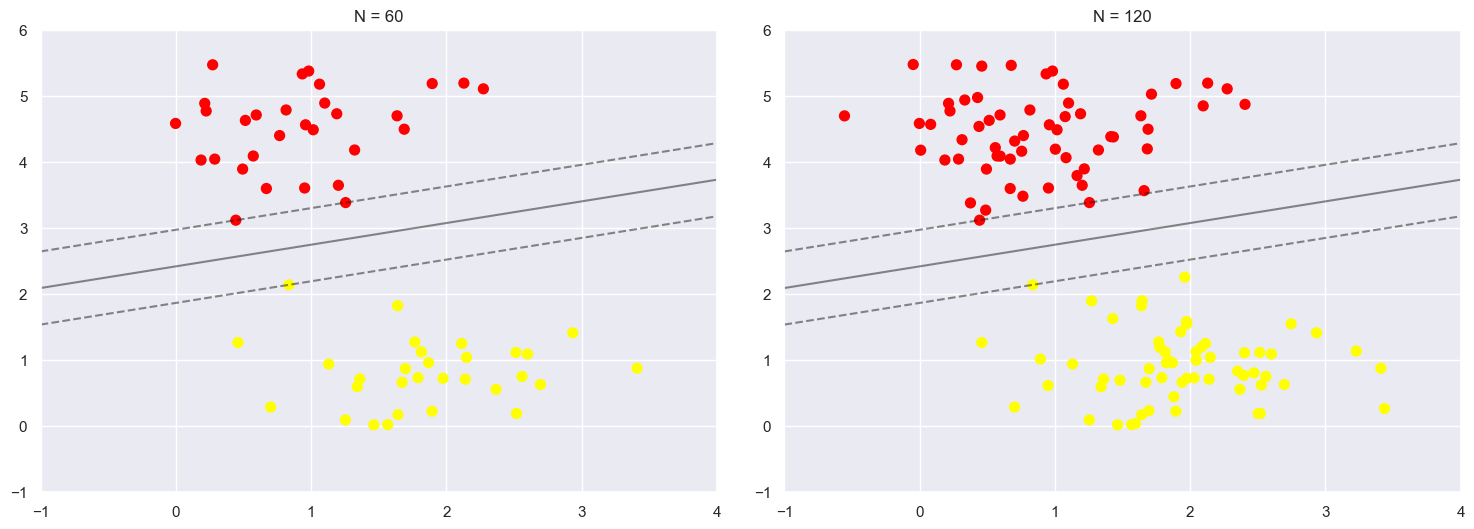

In [22]:

fig, ax = plt.subplots(1, 2, figsize=(16, 6))


fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)


for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)                      
    axi.set_title('N = {0}'.format(N))    

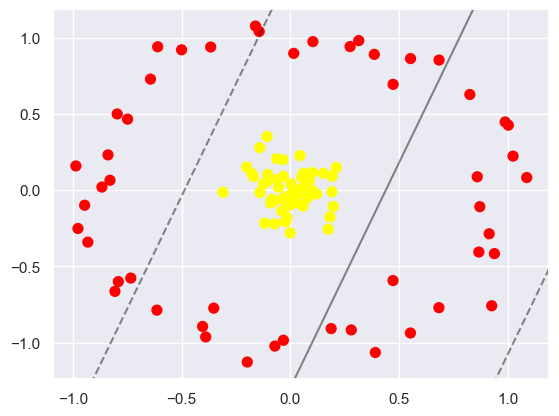

In [23]:
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=0.1, noise=0.1)

clf = SVC(kernel='linear').fit(X,y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)


In [24]:
r = np.exp(-(X**2).sum(1))

In [27]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    

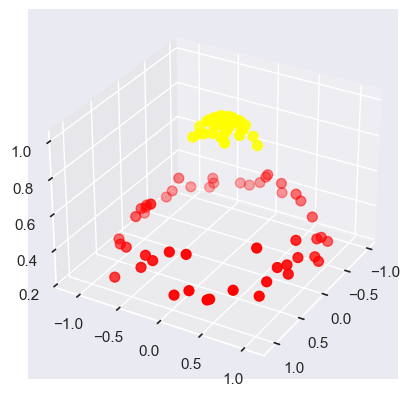

In [28]:
plot_3D()

In [29]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

,C,1000000.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


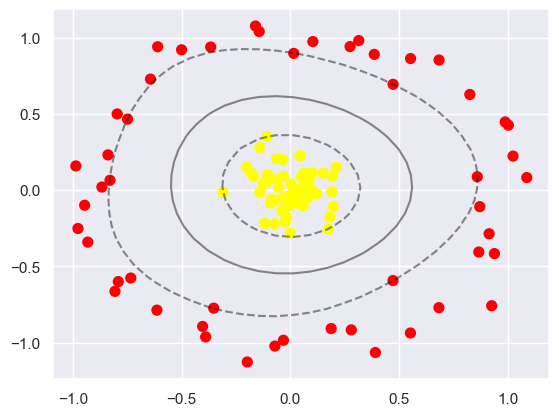

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

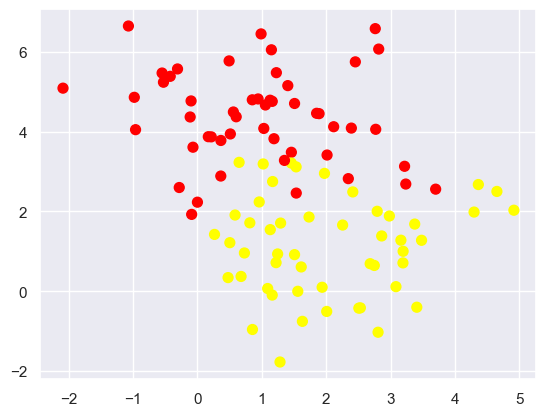

In [31]:
X, y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')


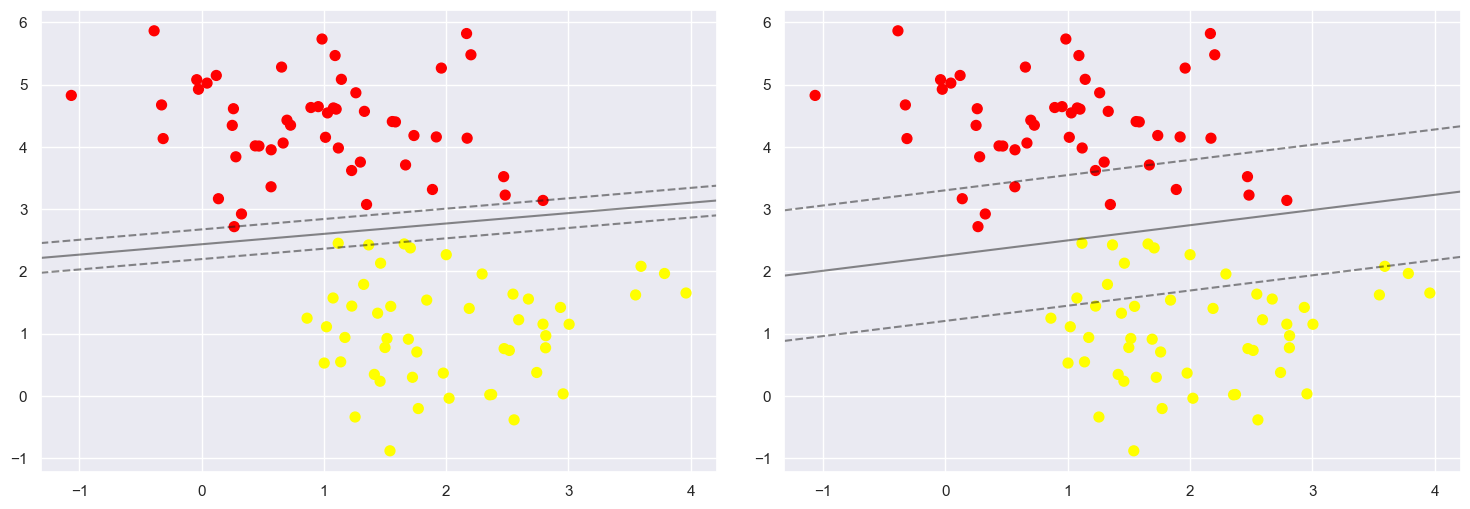

In [32]:
X, y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0,  0.1]):
    model = SVC(kernel='linear', C=C).fit(X,y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                linewidths=1, facecolors='none')
    

In [35]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


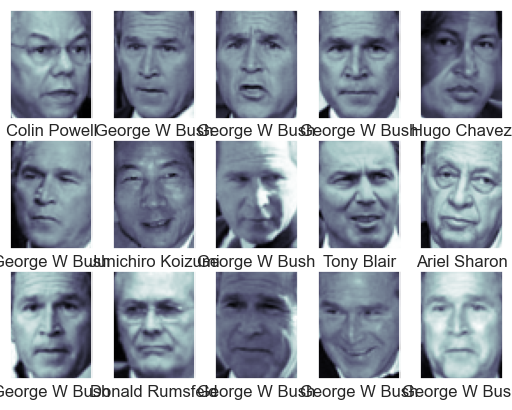

In [38]:
fig, ax = plt.subplots(3, 5)

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks = [],
            xlabel = faces.target_names[faces.target[i]])

In [39]:
62*47

2914

In [40]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc= SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)


In [41]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: total: 41.6 s
Wall time: 15.2 s
{'svc__C': 5, 'svc__gamma': 0.001}


In [44]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

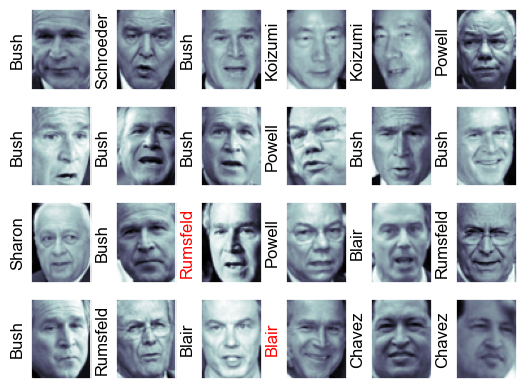

In [45]:
fig, ax = plt.subplots(4, 6)

for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47), cmap='bone')
    axi.set(xticks=[], yticks = [])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color = 'black' if yfit[i] == ytest[i] else 'red')
    

In [46]:
from sklearn.metrics import classification_report

print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(47.24999999999999, 0.5, 'Predict')

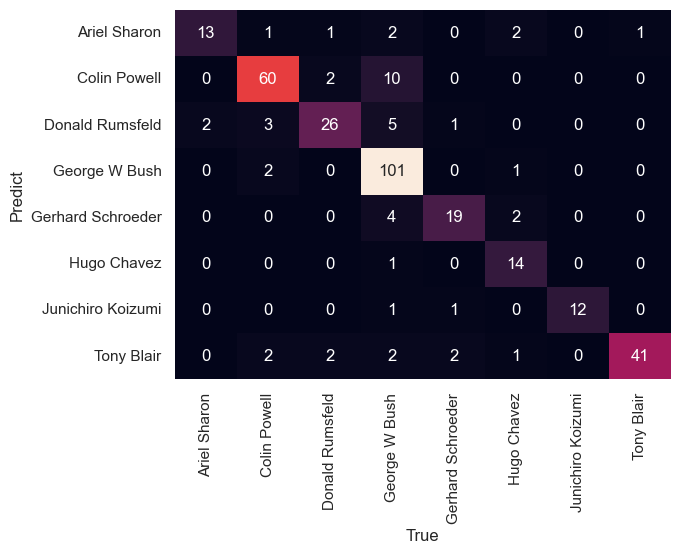

In [47]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, yfit)

sns.heatmap(mat.T, annot= True, fmt='d', cbar=False, 
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel("True")
plt.ylabel("Predict")